In [110]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
city = pd.read_csv('city.csv')

Столбцы и количество строк в таблице city

In [124]:
city.columns

Index(['address', 'postal_code', 'country', 'federal_district', 'region_type',
       'region', 'area_type', 'area', 'city_type', 'city', 'settlement_type',
       'settlement', 'kladr_id', 'fias_id', 'fias_level', 'capital_marker',
       'okato', 'oktmo', 'tax_office', 'timezone', 'geo_lat', 'geo_lon',
       'population', 'foundation_year'],
      dtype='object')

In [123]:
len(city)

1117

Узнали самое длинное название города в таблице

In [128]:
q=[]
for i in city["city"]:
    i = str(i)
    q.append(i)
print(f'Самое длинное название города в таблице имеет {len(max(list, key=len))} символов')

Самое длинное название города в таблице имеет 25 символов


Количество городов для каждого часового пояса в Сибирском и Приволжском федеральных округах
Ответ: 58

In [130]:
time = city[city['federal_district'].isin(['Приволжский', 'Сибирский'])]
time[['timezone','address']].groupby('timezone').count().rename({'address': 'Количество городов'}, axis=1)

,Количество городов
timezone,
UTC+3,101
UTC+4,41
UTC+5,58
UTC+6,6
UTC+7,86
UTC+8,22


Количество городов в каждом часовом поясе, отсортированное по убыванию.

In [148]:
q = city[['timezone','address']].groupby('timezone').count().sort_values('address', ascending=False)
q.rename({'address': 'Количество городов'}, axis=1)


,Количество городов
timezone,
UTC+3,660
UTC+5,173
UTC+7,86
UTC+4,66
UTC+9,31
UTC+8,28
UTC+10,22
UTC+2,22
UTC+11,17


Индивидуальное задание

In [116]:
weather = pd.read_csv('aus_weather.csv')
weather

,Year,Month,Day,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m,Season
0,1944,5,1,0.0,NaN,NaN,0.00,0.0,NaN,3
1,1944,5,2,0.0,NaN,NaN,0.00,0.0,NaN,3
2,1944,5,3,0.0,NaN,NaN,0.00,0.0,NaN,3
3,1944,5,4,4.3,NaN,NaN,0.00,0.0,NaN,3
4,1944,5,5,0.0,NaN,NaN,0.00,0.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...
26538,2016,12,27,0.4,16.3,23.2,19.75,6.9,26.8,2
26539,2016,12,28,0.6,8.9,23.5,16.20,14.6,30.3,2
26540,2016,12,29,0.0,9.5,24.8,17.15,15.3,31.6,2
26541,2016,12,30,0.0,10.6,24.2,17.40,13.6,30.6,2


Время года и средняя температура за дни когда осадки были от 3.5 мм до 4 мм 

In [132]:
q = weather[weather['rainfall_mm'].between(3.5, 4.0)]
q[['daily_avg', 'Season']].rename({'daily_avg':'Средняя температура по Цельсию'}, axis=1)

,Средняя температура по Цельсию,Season
73,14.25,4
148,16.65,1
374,16.35,3
409,11.10,4
418,15.65,4
...,...,...
26380,10.90,4
26393,13.80,4
26394,12.15,4
26454,16.25,1


Самое большое значение температуры, которое наблюдалось за  каждый год

In [118]:
q = weather[['Year','max_temp_C']].groupby('Year')
c = q.max()
c.rename({'max_temp_C':'Максимальная температура за год'}, axis=1)

,Максимальная температура за год
Year,
1944,38.7
1945,41.8
1946,38.8
1947,38.7
1948,42.8
...,...
2012,42.2
2013,41.1
2014,43.5


Случаи, когда первого числа каждого месяца, когда температура опускалась ниже чем 20 градусов. Сохранено в csv файл

In [134]:
k = weather[weather['Day'].isin(['1'])]
k = k[k['min_temp_C'] < 20]
k.to_csv('1.csv' ,encoding='utf-8', index=False, sep='|')

Показатели за 2016 годб представленные в формат json

In [ ]:
weather_2016 = weather[weather['Year'].isin(['2016'])]
weather_2016 = weather_2016[['rainfall_mm','min_temp_C', 'max_temp_C', 'daily_avg']]
result = weather_2016.to_json(orient="records")
parsed = json.loads(result)
parse

График осадков за Январь 2000-го года

<BarContainer object of 31 artists>

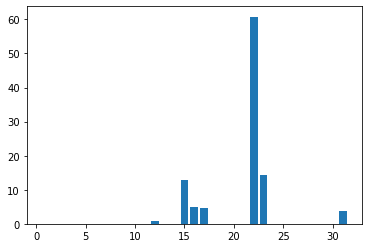

In [147]:
q_1 = weather[weather['Year'] == 2000]
q_2 = q_1[q_1['Month'] == 1]
x = q_2['Day']
y = q_2['rainfall_mm']
plt.bar(x, y)